In [13]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv =10, scoring = 'accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [4]:
print scores.mean()

0.966666666667


In [9]:
k_range = range(1,31)
k_scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


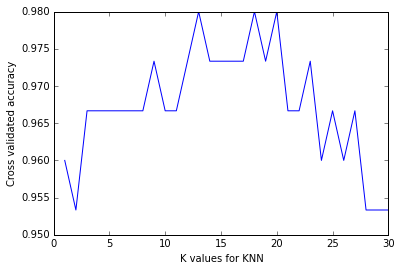

In [14]:
plt.plot(k_range,k_scores)
plt.xlabel('K values for KNN')
plt.ylabel('Cross validated accuracy')

# Using Grid search CV

In [15]:
from sklearn.grid_search import GridSearchCV

In [17]:
k_range = range(1,31)

In [18]:
# make a parameter grid : map the key name to the list of parameters
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [20]:
# instantiate the grid
grid = GridSearchCV(knn,param_grid,cv =10, scoring = 'accuracy', n_jobs = -1)


We can use the attribute n_jobs = -1 to run parallel computing

In [21]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [22]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [24]:
# examining the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [25]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


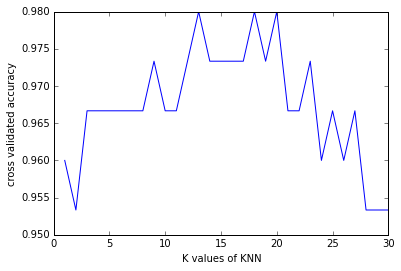

In [26]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel('K values of KNN')
plt.ylabel('cross validated accuracy')

In [27]:
# examining the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')


# Tuning the parameters

In [29]:
k_range = range(1,31)
weight_options = ['uniform','distance']

In [32]:
param_grid = dict(n_neighbors = k_range , weights = weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [34]:
grid = GridSearchCV(knn,param_grid,cv =10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [35]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [36]:
grid.best_score_
grid.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

Now use the best parameters to train our model

In [38]:
knn = KNeighborsClassifier(n_neighbors=13,weights = 'uniform')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')

In [39]:
knn.predict([3,5,4,2])

array([1])

In [41]:
# using directly grid to make use of the best parameters
grid.predict([3,5,4,2])

array([1])

# Using RandomisedsearchCV to reduce computational expense

In [42]:
from sklearn.grid_search import RandomizedSearchCV

In [44]:
param_dist = dict(n_neighbors = k_range, weights = weight_options)

In [45]:
rand = RandomizedSearchCV(knn,param_dist,scoring = 'accuracy',n_iter=10,random_state=5)

In [46]:
rand.fit(X,y)
rand.grid_scores_

[mean: 0.98000, std: 0.01601, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.98000, std: 0.00058, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.00897, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.94667, std: 0.03293, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.02402, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.00897, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.98000, std: 0.01601, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.98667, std: 0.00924, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.95333, std: 0.02402, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.97333, std: 0.00897, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [47]:
rand.best_score_
rand.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [50]:
# doing randomisedSearchCV 20 times
best_scores = []
for i in range(20):
    rand = RandomizedSearchCV(knn,param_dist,scoring='accuracy',n_iter=10)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_,3))
print best_scores

[0.987, 0.98, 0.987, 0.987, 0.98, 0.987, 0.987, 0.98, 0.987, 0.973, 0.98, 0.98, 0.987, 0.98, 0.98, 0.98, 0.987, 0.987, 0.987, 0.987]
